In [ ]:
"C:\Users\sunny\Data Science Studies\GitHub_Desktop\BusinessCase_Data_Exploration-\E_commerce_AwesomeWorks_sports_products_from_MavenAnalytics\mavenaw-deb82dbe4663.json"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [4]:
#Set environment variables for your notebook
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "C:\\Users\\sunny\\Data Science Studies\\GitHub_Desktop\\BusinessCase_Data_Exploration-\\E_commerce_AwesomeWorks_sports_products_from_MavenAnalytics\\mavenaw-deb82dbe4663.json"

In [6]:
%load_ext google.cloud.bigquery


In [7]:
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()

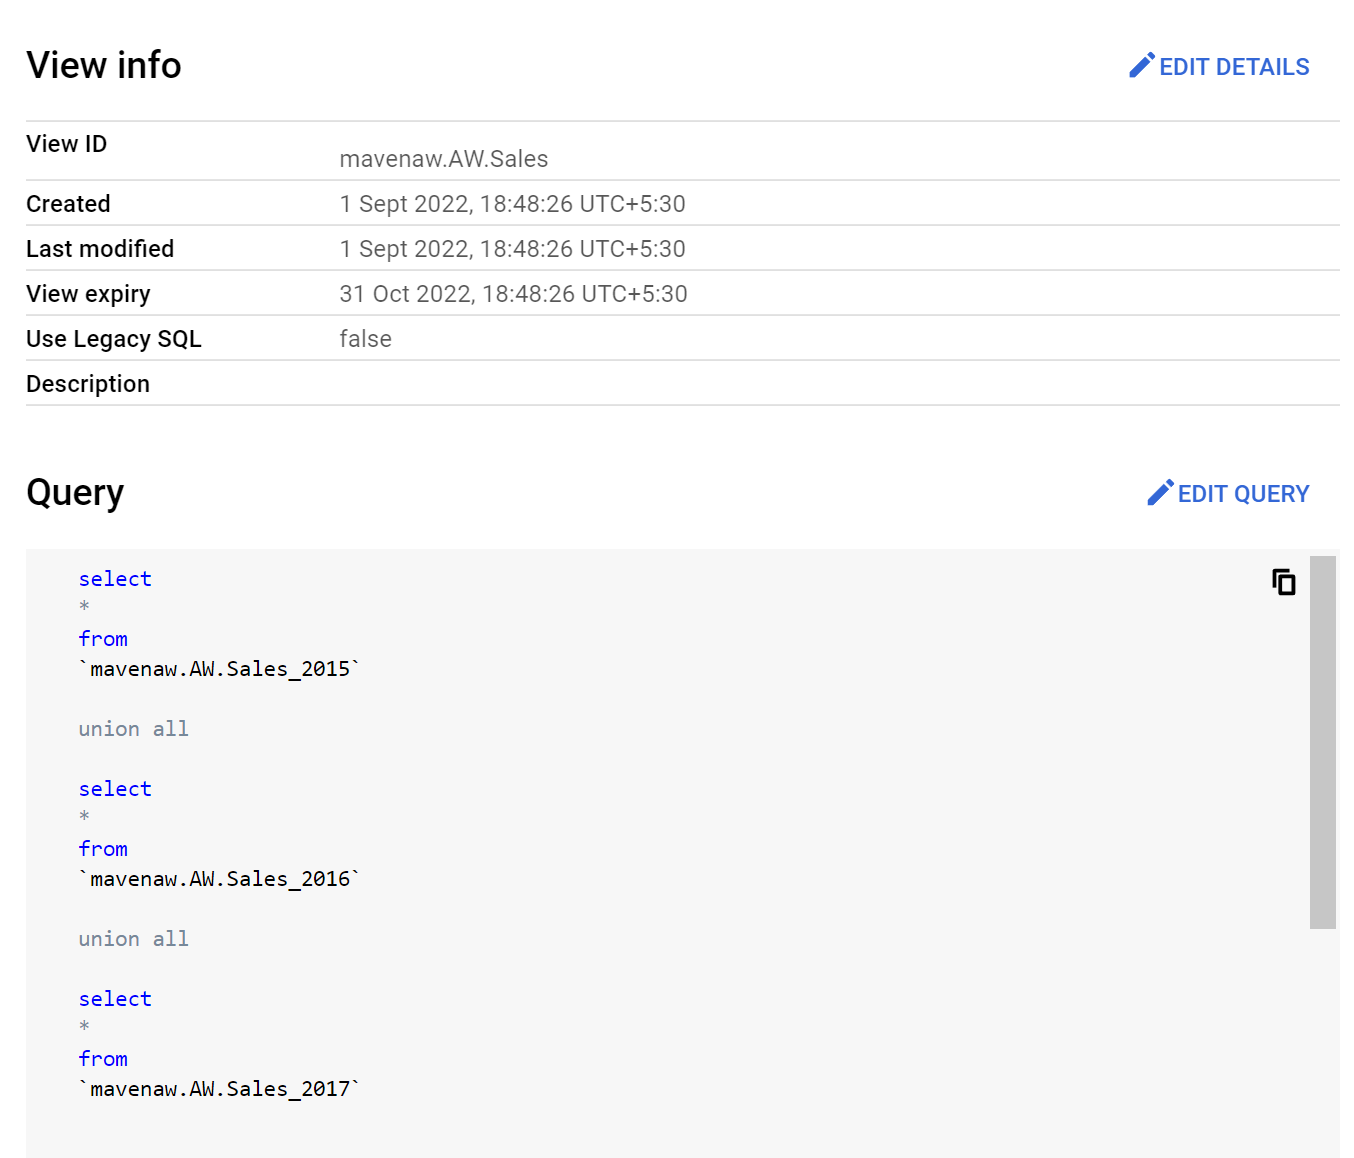

    select
    *
    from
    `mavenaw.AW.Sales_2015`

    union all

    select
    *
    from
    `mavenaw.AW.Sales_2016`

    union all

    select
    *
    from
    `mavenaw.AW.Sales_2017`

In [9]:
bigquery_client.query("""

SELECT
    * EXCEPT(is_generated, generation_expression, is_stored, is_updatable,is_hidden
    ,is_system_defined,is_partitioning_column,
    clustering_ordinal_position,collation_name,column_default,ordinal_position,table_catalog)
  FROM
    mavenaw.AW.INFORMATION_SCHEMA.COLUMNS
  WHERE
    table_name = 'Customers';
    
""").to_dataframe()

,table_schema,table_name,column_name,is_nullable,data_type
0,AW,Customers,CustomerKey,YES,INT64
1,AW,Customers,Prefix,YES,STRING
2,AW,Customers,FirstName,YES,STRING
3,AW,Customers,LastName,YES,STRING
4,AW,Customers,BirthDate,YES,DATE
5,AW,Customers,MaritalStatus,YES,STRING
6,AW,Customers,Gender,YES,STRING
7,AW,Customers,EmailAddress,YES,STRING
8,AW,Customers,AnnualIncome,YES,INT64
9,AW,Customers,TotalChildren,YES,INT64


In [11]:
bigquery_client.query("""

SELECT
    table_schema,table_name,table_type
  FROM
    AW.INFORMATION_SCHEMA.TABLES
""").to_dataframe()

,table_schema,table_name,table_type
0,AW,Sales,VIEW
1,AW,Products,BASE TABLE
2,AW,Product_Subcategories,BASE TABLE
3,AW,Sales_2017,BASE TABLE
4,AW,Product_Categories,BASE TABLE
5,AW,Territories,BASE TABLE
6,AW,Returns,BASE TABLE
7,AW,Sales_2015,BASE TABLE
8,AW,Sales_2016,BASE TABLE
9,AW,Customers,BASE TABLE
